In [1]:
%load_ext autoreload
%autoreload 2

from sindy_bvp import SINDyBVP
from sindy_bvp.differentiators import FiniteDifferences

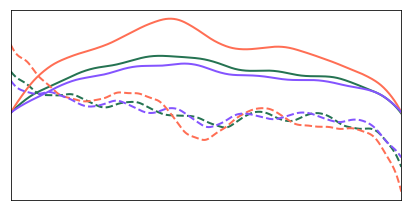

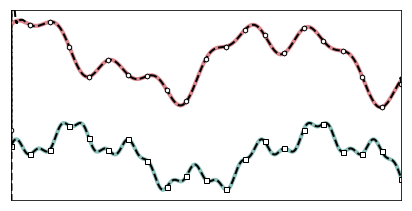

Learned function for d^{2}u/dx^{2} includes: ['u', 'u^{2}', 'du/dx', 'f']
L2 p error: 0.0004
L2 q error: 0.0044
CPU times: user 5.78 s, sys: 450 ms, total: 6.23 s
Wall time: 6.43 s


In [2]:
%%time

outcome_var = 'd^{2}u/dx^{2}'

# Known Operator Case
sbvp_ko = SINDyBVP(file_stem = "./data/S2-NLSL-",
                num_trials = 6,
                differentiator = FiniteDifferences(diff_order = 2),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = ['u', 'u^{2}', 'du/dx', 'f'],
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_ko.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3b-KO', 
                                coeff_ylims=[-1,3])

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()

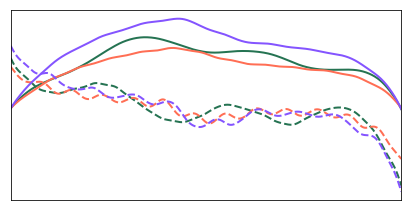

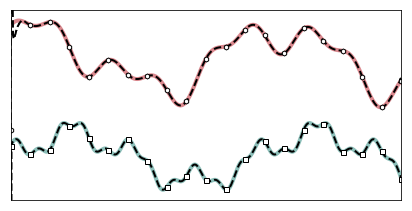

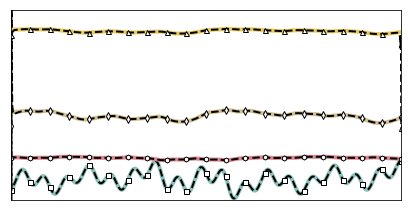

Learned function for d^{2}u/dx^{2} includes: ['u', 'u^{2}', 'du/dx', 'f']
L2 p error: 0.0003
L2 q error: 0.0124
CPU times: user 39.3 s, sys: 33.5 s, total: 1min 12s
Wall time: 43.3 s


In [3]:
%%time

# Unknown Operator Case
sbvp_uo = SINDyBVP(file_stem = "./data/S2-NLSL-",
                num_trials = 10,
                differentiator = FiniteDifferences(diff_order = 2),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = None,
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_uo.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3b-UO', 
                                coeff_ylims=[-1,3],
                                xi_ylims=[-1,8],
                                plot_xi=True)

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()